In [4]:
from .Modules.Architectures import CNN_MNV2
from Datasets import BaseDatasetPalm
from Utils import predict, unpack_masks
import torch
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import pandas as pd
import numpy as np
from Plotting import Prediction_plot, QQ_plot, Confusion_Matrix_Regression
from matplotlib import rcParams
rcParams['font.family'] = 'serif'  # Change to a serif font\

ImportError: attempted relative import with no known parent package

In [25]:
import pandas as pd
import numpy as np

Model_1_scaled = pd.read_csv('/home/u108-n256/PalmProject/NeuralNetwork_Testing/Saved_Objects/20240725_Predictions_CNN/Model_Prediction_male_all_data.csv')
mean = np.mean(Model_1_scaled['Actual'].values)

In [6]:
Model_1_scaled = pd.read_csv('/home/u108-n256/PalmProject/NeuralNetwork_Testing/Saved_Objects/20240725_Predictions_CNN/Model_Prediction_male_all_data.csv')
Prediction_plot(Model_1_scaled.iloc[200:400])
QQ_plot(Model_1_scaled)

NameError: name 'pd' is not defined

NameError: name 'Model_1_scaled' is not defined

     Predicted  Actual
0     6.548903     3.0
1     2.066418     9.0
2     2.581664     9.0
3     6.717889     7.0
4     5.802304     5.0
..         ...     ...
373   2.581664    12.0
374   6.717889     9.0
375   5.802304     3.0
376   5.233538    13.0
377   0.028313     0.0

[378 rows x 2 columns]


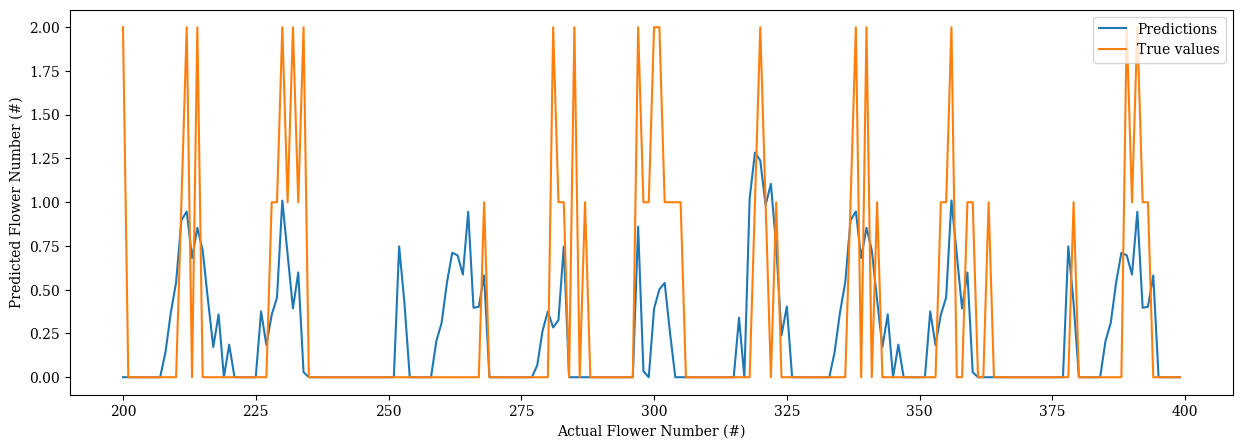

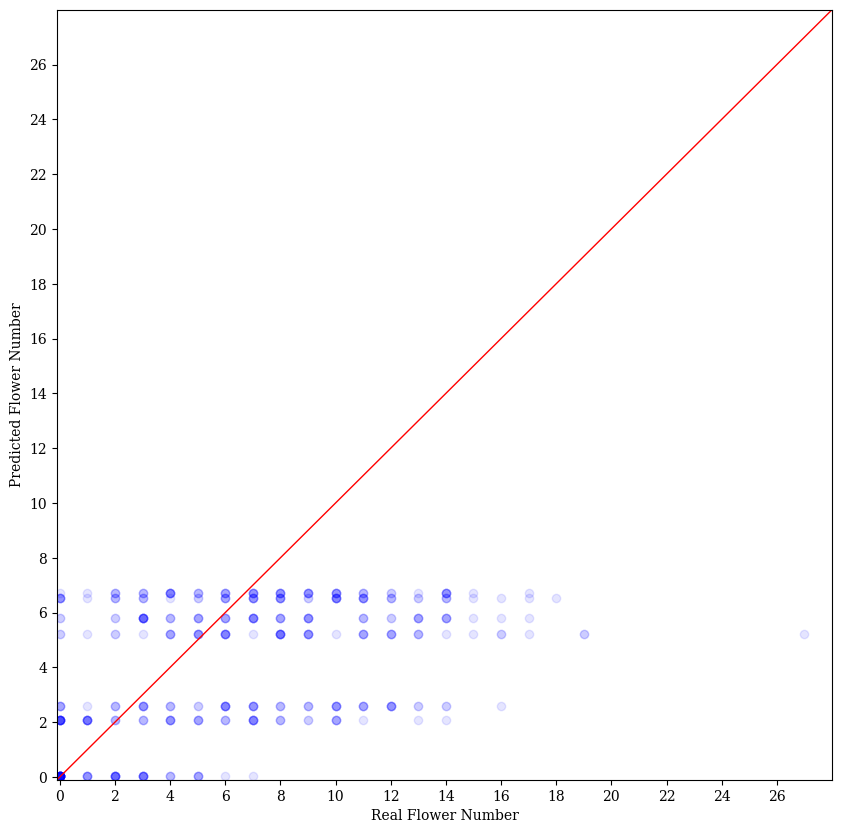

In [ ]:
Model_2_scaled = pd.read_csv('/home/u108-n256/PalmProject/NeuralNetwork_Testing/Saved_Objects/20240725_Predictions_CNN/Model_prediction_male_weather_data.csv')
Prediction_plot(Model_2_scaled.iloc[200:400], saving_path='/home/u108-n256/PalmProject/NeuralNetwork_Testing/Saved_Objects/20240725_Predictions_CNN', title='')
QQ_plot(Model_2_scaled, saving_path='/home/u108-n256/PalmProject/NeuralNetwork_Testing/Saved_Objects/20240725_Predictions_CNN', title='', alpha=0.1)

     Predicted  Actual
0    16.901708    18.0
1    14.899211    12.0
2    11.559366    10.0
3    13.605103    13.0
4    17.171631    14.0
..         ...     ...
373  10.791048     8.0
374   3.717821    14.0
375  14.187802    15.0
376  13.951338    13.0
377   0.000000     0.0

[378 rows x 2 columns]


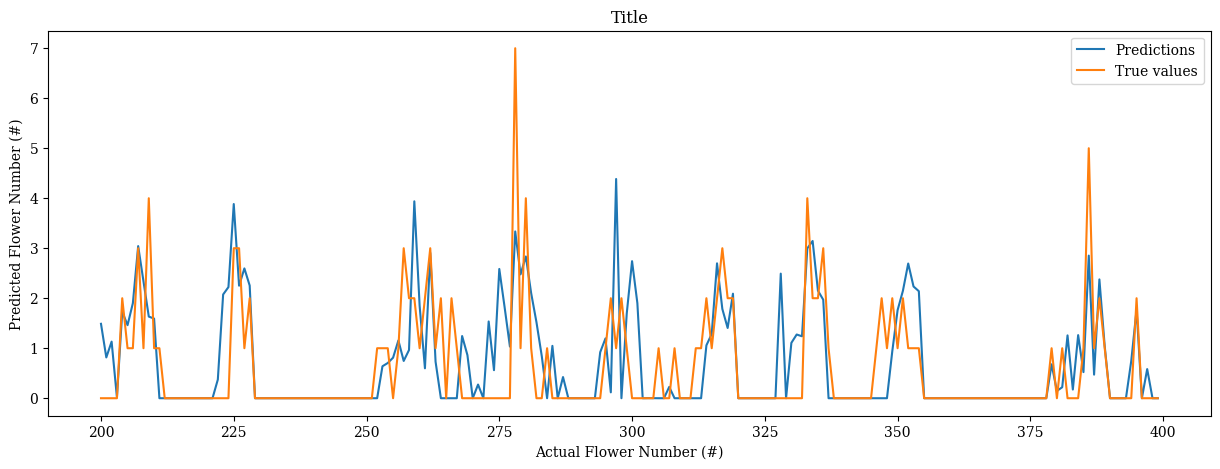

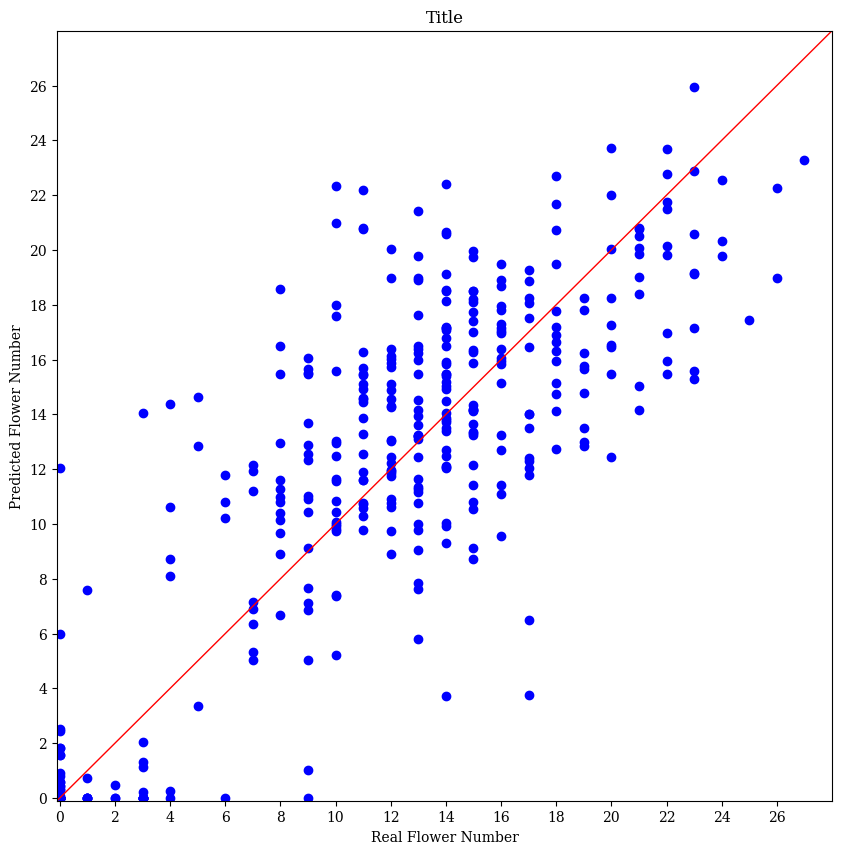

In [ ]:
Model_3_scaled = pd.read_csv('/home/u108-n256/PalmProject/NeuralNetwork_Testing/Saved_Objects/20240725_Predictions_CNN/Model_Prediction_female_all_data.csv')
Prediction_plot(Model_3_scaled.iloc[200:400])
QQ_plot(Model_3_scaled)

     Predicted  Actual
0     5.747091     3.0
1     1.867511     9.0
2     6.726115     9.0
3     1.886079     7.0
4     3.600260     5.0
..         ...     ...
373   8.181532    12.0
374   5.419753     9.0
375   7.675798     3.0
376  10.537988    13.0
377   0.808299     0.0

[378 rows x 2 columns]


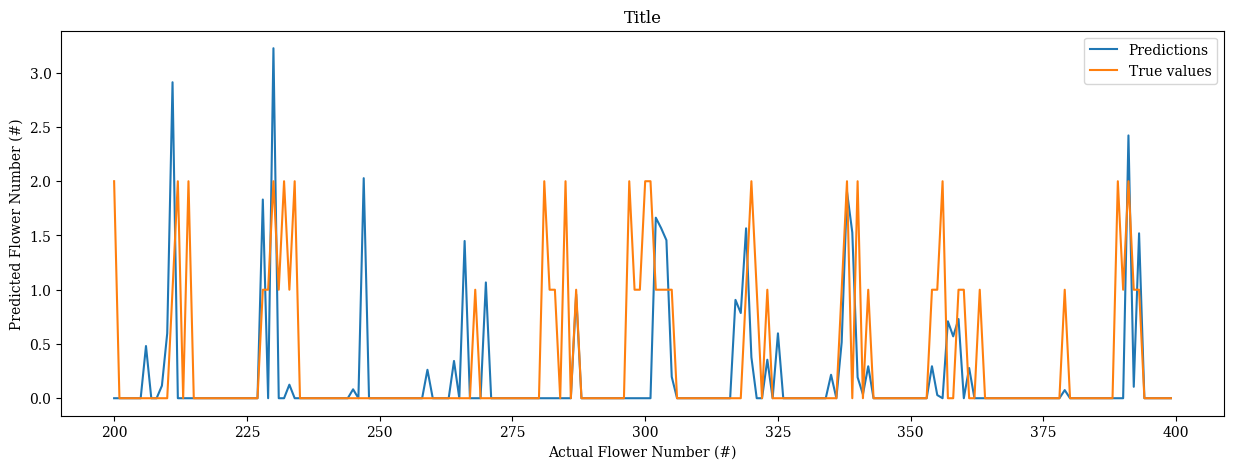

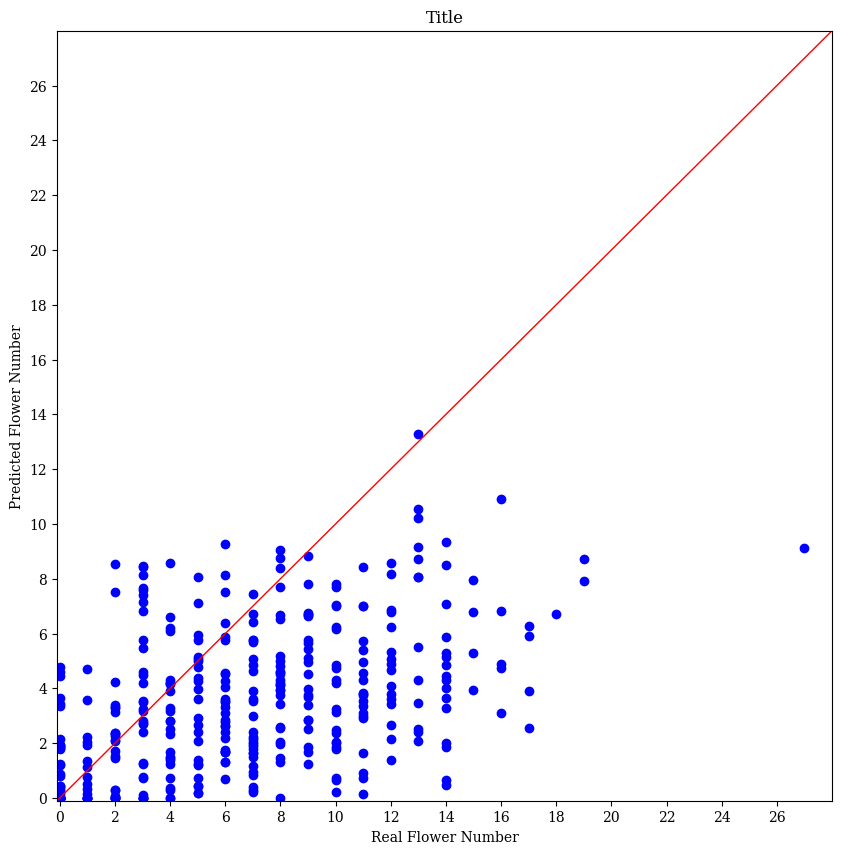

In [ ]:
Model_4_scaled = pd.read_csv('/home/u108-n256/PalmProject/NeuralNetwork_Testing/Saved_Objects/20240725_Predictions_CNN/Model_Prediction_male_pheno_data.csv')
Prediction_plot(Model_4_scaled.iloc[200:400])
QQ_plot(Model_4_scaled)

/tmp/ipykernel_157486/1973449007.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(np.arange(-20*25,(200*20)+1,20*25))
/tmp/ipykernel_157486/1973449007.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(np.arange(-20*25,(200*20)+1,20*25))


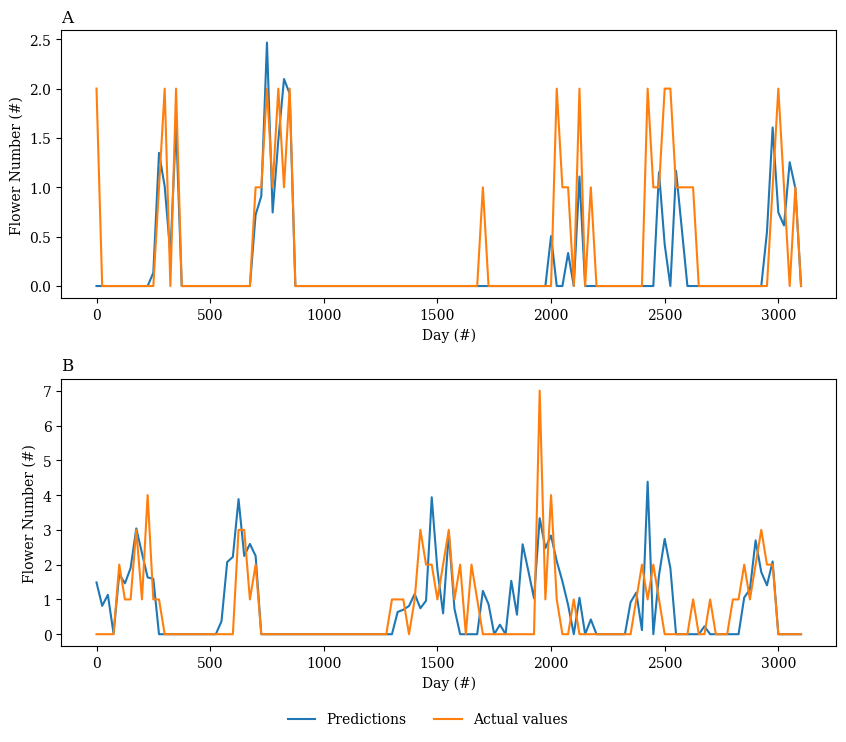

In [ ]:

fig, [ax1, ax2] = plt.subplots(nrows=2, ncols=1, figsize=(10,8))

ax1.plot(Model_1_scaled['Predicted'].iloc[200:325])
ax1.plot(Model_1_scaled['Actual'].iloc[200:325])
ax1.set_xlabel('Day (#)')
ax1.set_ylabel('Flower Number (#)')
ax1.set_xticklabels(np.arange(-20*25,(200*20)+1,20*25))
ax1.set_title('A', loc='left')

ax2.plot(Model_3_scaled['Predicted'].iloc[200:325], label='Predictions')
ax2.plot(Model_3_scaled['Actual'].iloc[200:325], label='Actual values')
ax2.set_xlabel('Day (#)')
ax2.set_ylabel('Flower Number (#)')
ax2.set_xticklabels(np.arange(-20*25,(200*20)+1,20*25))
ax2.set_title('B', loc='left')
ax2.legend(frameon=False, bbox_to_anchor=(0.67, -0.2), ncol=2)
plt.subplots_adjust(hspace=0.3) 
plt.savefig('/home/u108-n256/PalmProject/NeuralNetwork_Testing/Saved_Objects/Graphs/Prediction_Timeline_malevsfemale.svg')
plt.show()

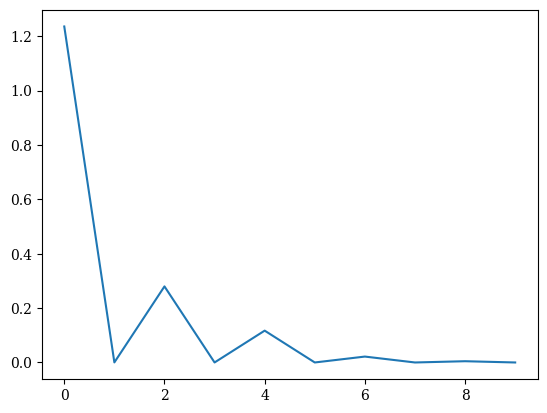

[1.23567689e+00 2.64646758e-04 2.79771298e-01 6.93031186e-05
 1.17079532e-01 2.42369235e-05 2.17084965e-02 4.60032994e-06
 4.63439814e-03 9.37104247e-07]


In [ ]:
from scipy.stats import gaussian_kde

data = (Model_1_scaled['Actual'].values + Model_2_scaled['Actual'].values).reshape(-1)
kd = gaussian_kde(data.T)

plt.plot(kd(np.arange(0,10)))
plt.show()

print(kd(np.arange(0,10)))

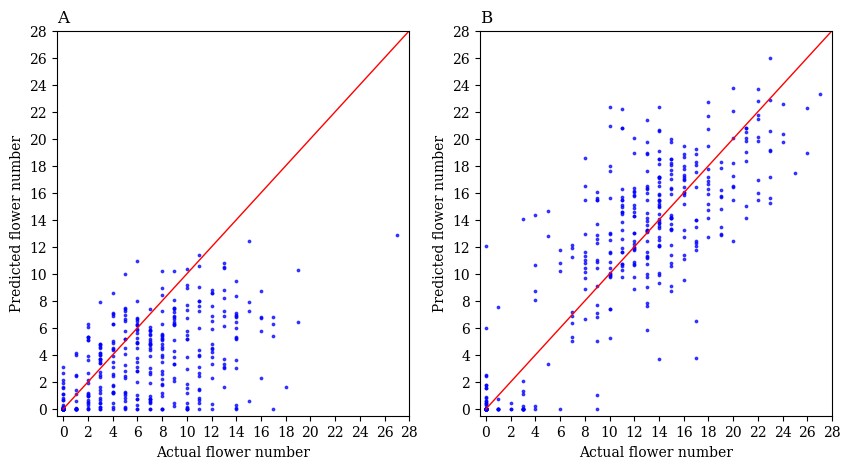

In [ ]:
fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

group_index = np.arange(len(Model_1_scaled)) // 18
grouped_df = Model_1_scaled.groupby(group_index).sum().reset_index(drop=True)

ax1.scatter(grouped_df['Actual'], grouped_df['Predicted'],c='blue', s=3, alpha=0.7)
ax1.set_xlim(-0.5,grouped_df['Actual'].values.max()+0.5)
ax1.set_ylim(-0.5,grouped_df['Actual'].values.max()+0.5)
ax1.set_xlabel('Actual flower number')
ax1.set_ylabel('Predicted flower number')
ax1.set_xticks(np.arange(0,grouped_df['Actual'].values.max()+2,2),np.arange(0,grouped_df['Actual'].values.max()+2,2,dtype=int))
ax1.set_yticks(np.arange(0,grouped_df['Actual'].values.max()+2,2),np.arange(0,grouped_df['Actual'].values.max()+2,2,dtype=int))
ax1.plot([0, grouped_df['Actual'].values.max() + 1], [0, grouped_df['Actual'].values.max() + 1], color='red', linewidth=1)
ax1.set_title('A', loc='left')

group_index = np.arange(len(Model_3_scaled)) // 18
grouped_df = Model_3_scaled.groupby(group_index).sum().reset_index(drop=True)
ax2.scatter(grouped_df['Actual'], grouped_df['Predicted'],c='blue',s=3,alpha=0.7)
ax2.set_xlim(-0.5,grouped_df['Actual'].values.max()+0.5)
ax2.set_ylim(-0.5,grouped_df['Actual'].values.max()+0.5)
ax2.set_xlabel('Actual flower number')
ax2.set_ylabel('Predicted flower number')
ax2.set_xticks(np.arange(0,grouped_df['Actual'].values.max()+2,2),np.arange(0,grouped_df['Actual'].values.max()+2,2,dtype=int))
ax2.set_yticks(np.arange(0,grouped_df['Actual'].values.max()+2,2),np.arange(0,grouped_df['Actual'].values.max()+2,2,dtype=int))
ax2.plot([0, grouped_df['Actual'].values.max() + 1], [0, grouped_df['Actual'].values.max() + 1], color='red', linewidth=1)
ax2.set_title('B', loc='left')
plt.savefig('/home/u108-n256/PalmProject/NeuralNetwork_Testing/Saved_Objects/Graphs/QQ_plot_malevsfemale.svg')
plt.show()